In [9]:
import mitsuba as mi

mi.set_variant('scalar_rgb')

# Create an alias for convenience
from mitsuba import ScalarTransform4f as T

scene = mi.load_dict({
    
    'type': 'scene',
    # The keys below correspond to object IDs and can be chosen arbitrarily
    'integrator': {'type': 'ptracer'},
    #'light': {'type': 'constant'},
    'red_face': { #red
        'type': 'obj',
        'filename': './scenes/meshes/cbox_back.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [1.0, 0.0, 0.0]},
            }
        }
            
    },
    'sensor': {
        'type': 'perspective',
        'fov': 39.3077,
        'to_world': T.look_at(
            origin=[0, 0, 1],
            target=[0, 0, -1],
            up=[0, 1, 0]
        ),
        'sampler': {
            'type': 'independent',
            'sample_count': 16
        },
        'film': {
            'type': 'hdrfilm',
            'width': 256,
            'height': 256,
            'rfilter': {
                'type': 'tent',
            },
            'pixel_format': 'luminance',
        },
    },

    'blue_face': { #blue
        'type': 'obj',
        'filename': './scenes/meshes/cbox_floor.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [0.0, 0.0, 1.0]},
            }
        }
    },
    'yellow_face': { #yellow
        'type': 'obj',
        'filename': './scenes/meshes/cbox_ceiling.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [1.0, 1.0, 0.0]},
            }
        }
    },
    'pink_face': { #pink
        'type': 'obj',
        'filename': './scenes/meshes/cbox_greenwall.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [1.0, 0.0, 1.0]},
            }
        }
    },
    'lightblue_face': { #light blue
        'type': 'obj',
        'filename': './scenes/meshes/cbox_redwall.obj',
        'bsdf' : {
            'type': 'twosided',
            'material':{
                'type' : 'diffuse',
                'reflectance': {'type': 'rgb', 'value': [0.0, 1.0, 1.0]},
            }
        }
    },
    'photon': {
        'type': 'photon_emitter_olivia',
        'to_world': mi.ScalarTransform4f.look_at(
            origin=[0, 0, 1],
            target=[0, 0, -1],
            up=[0, 1, 0]
        ),
        # 'intensity': {
        #     'type': 'spectrum',
        #     'value': 2000.0,
        # },
        # #'cutoff_angle': 0.09185751583432335
        # 'cutoff_angle': 0.5

    },
})



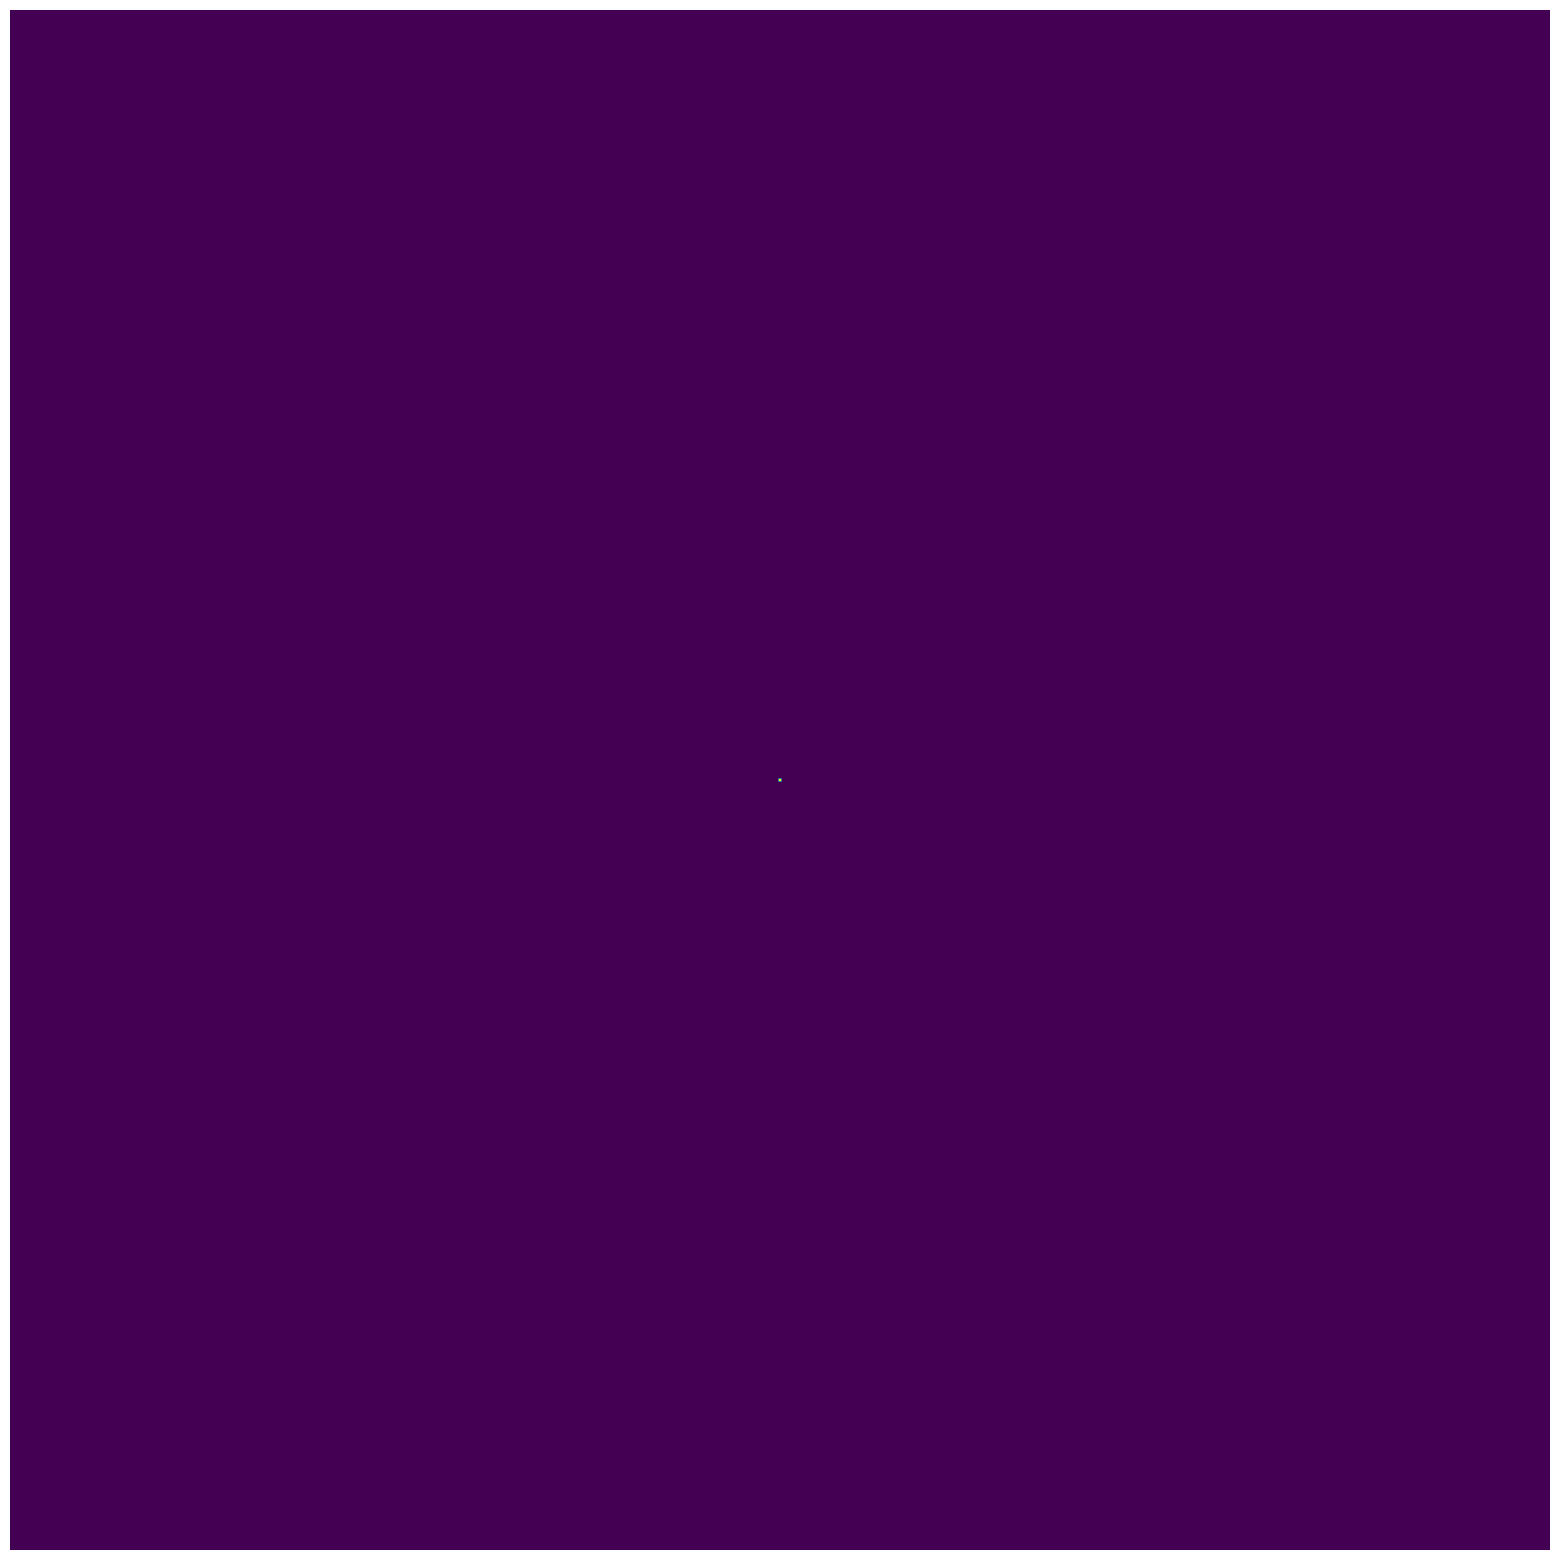

In [10]:
from matplotlib import pyplot as plt
image = mi.render(scene, spp=64)
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(image ** (1.0 / 2.2)); 